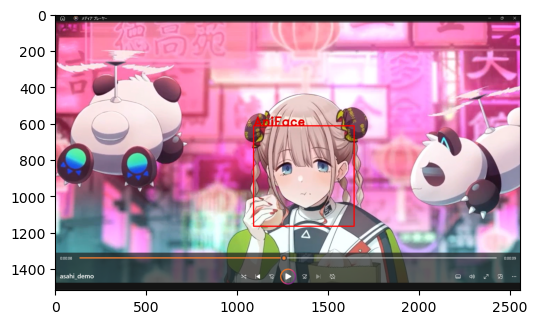

In [1]:
import cv2
import matplotlib.pyplot as plt

# 画像を表示するための関数
def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    return plt.imshow(a, **kwargs)

classifier = cv2.CascadeClassifier('lbpcascade_animeface.xml')
image = cv2.imread('asahi_demo.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = classifier.detectMultiScale(gray_image)
for x,y,w,h in faces:
    color = (0, 0, 225)
    pen_w = 5
    text_size = w/240 
    # 四角
    cv2.rectangle(image, (x,y), (x+w,y+h), color=(0,0,255), thickness=5)
    # 文字列
    cv2.putText(image, text="AniFace", org=(x,y), fontScale=text_size, fontFace=cv2.FONT_HERSHEY_DUPLEX, thickness=pen_w, color=color)

cv2.imwrite('faces.jpg',image)
plt.figure(figsize=(6, 6), dpi=100)
cv2_imshow(image)

In [11]:
import cv2
import tqdm

print("start")
cascade_file  = 'lbpcascade_animeface.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 動画ファイル名を適宜変更
video = cv2.VideoCapture('asahi_demo.mp4')
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
size = (width, height)
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(str(frame_count)+" frames")
frame_rate = int(video.get(cv2.CAP_PROP_FPS))

# 保存用
fmt = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter('output.mp4', fmt, frame_rate, size)

for i in tqdm.tqdm(range(frame_count-1)):
    ret, frame = video.read()
    img = frame

    # 検出するために白黒に変換
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray)

    # 顔を認識した時だけ矩形とテキストをカラー画像の方に合成する
    if len(face_list) != 0 :
        for (x,y,w,h) in face_list:
            color = (0, 0, 225)
            pen_w = 5
            text_size = w / 240
            cv2.rectangle(img, (x, y), (x+w, y+h), color=color, thickness=pen_w)
            cv2.putText(img, text="AniFace", org=(x,y), fontScale=text_size, fontFace=cv2.FONT_HERSHEY_DUPLEX, thickness=pen_w-3, color=color)


    writer.write(img)

writer.release()
video.release()
print("end")

start
766 frames


100%|██████████| 765/765 [00:21<00:00, 34.79it/s]

end
